# Home Quiz 1 - Logistic Regression

## Problem 2: Logistic Regression

#### Team F
Andreas Chouliaras 2143


\textbf{a)}  Considering the case of two classes (C1 and C2), suppose we have a dataset $\{x^{(i)}_{p},y^{(i)}\}$ where $i=1,...,N$ is the sample index and p the number of features.<br>

Our model uses the logistic function $\sigma(z)$:
$$
 \sigma(z)= \frac{1}{1 + e^{-z}} 
$$
We will denote: 
$$
 w^T\mathbf{x^{(i)}}= w_0 + \sum_{p=0}^{P} w_px^{(i)}_p = w_0 + w_1 x^{(i)}_1 + w_2 x^{(i)}_2 + ... + w_p x^{(i)}_p
$$
The posterior probability of class C1 can be written as :
$$
P(Y=C1|\mathbf{x^{(i)}}) = \sigma(w^T\mathbf{x^{(i)}})
$$

And the posterior probability of class C2 is:
$$
P(Y=C2|\mathbf{x^{(i)}}) = 1-P(Y=C1|\mathbf{x^{(i)}}) = 1- \sigma(w^T\mathbf{x^{(i)}})
$$



The labels that we are predicting are binary.This means that we can (and should) interpret each label as a Bernoulli random variable. <br> Thus the likelihood for one data point is:

$$
P(Y=y^{(i)}|\mathbf{x^{(i)}}) = \sigma(w^T\mathbf{x^{(i)}})^{y^{(i)}}  [1-\sigma(w^T\mathbf{x^{(i)}}) ]^{(1-y^{(i)})}
$$

So the likelihood function becomes:
$$
L(w)=\prod_{i=1}^{n} P(Y=y^{(i)}|\mathbf{x^{(i)}}) \\
L(w)=\prod_{i=1}^{n} \sigma(w^T\mathbf{x}^{(i)})^{y^{(i)}}  [1-\sigma(w^T\mathbf{x}^{(i)}) ]^{(1-y^{(i)})}
$$

As usual, it is more convenient to maximize the log of the likelihood function.
The log likelihood equation is:

$$
logL(w)= \sum_{i=1}^{n} y^{(i)} log(\sigma(w^T\mathbf{x^{(i)}})) + (1-y^{(i)}) log(1-\sigma(w^T\mathbf{x}^{(i)}))
$$
This will be our objective function $f$ for gradient ascend.

\textbf{b)} Since the likelihood function is a sum over all of the data, and in calculus the derivative of a sum
is the sum of derivatives, we can focus on computing the derivative of one example.<br>
We calculate the partial derivatives with respect to a general w we used until now:

\begin{align*}
\frac{\partial f}{\partial w} &= \frac{\partial }{\partial w} [y^{(i)} log(\sigma(w^T\mathbf{x^{(i)}})) + (1-y^{(i)}) log(1-\sigma(w^T\mathbf{x}^{(i)}))] \\
&= \frac{\partial }{\partial w} [y^{(i)} log(\sigma(w^T\mathbf{x^{(i)}}))] + \frac{\partial }{\partial w} [(1-y^{(i)}) log(1-\sigma(w^T\mathbf{x}^{(i)}))] \\
&= \Bigg[\frac{y^{(i)}}{\sigma(w^T\mathbf{x^{(i)}})} - \frac{(1-y^{(i)})}{1-\sigma(w^T\mathbf{x}^{(i)}))} \Bigg]\frac{\partial }{\partial w} \sigma(w^T\mathbf{x^{(i)}}) \\
&= \Bigg[\frac{y^{(i)} -\sigma(w^T\mathbf{x}^{(i)}) }{\sigma(w^T\mathbf{x^{(i)}})(1-\sigma(w^T\mathbf{x}^{(i)}))}  \Bigg]\frac{\partial }{\partial w} \sigma(w^T\mathbf{x^{(i)}})
\end{align*}

We can calculate:
$$
\frac{\partial }{\partial w} \sigma(w^T\mathbf{x^{(i)}}) =  \frac{e^{-w^T\mathbf{x^{(i)}}}}{(1+e^{-w^T\mathbf{x^{(i)}}})^2}\mathbf{x^{(i)}}
$$
But we see that:
$$
 \sigma(w^T\mathbf{x^{(i)}})(1-\sigma(w^T\mathbf{x}^{(i)})=  \frac{e^{-w^T\mathbf{x^{(i)}}}}{(1+e^{-w^T\mathbf{x^{(i)}}})^2}
$$
So after cancelling the same terms the derivative becomes:
$$
\frac{\partial f}{\partial w}= \big[y^{(i)} -\sigma(w^T\mathbf{x}^{(i)}) \big]\mathbf{x^{(i)}}
$$
To calculate the partial derivatives with respect to $w_0$ and with respect to an arbitrary $w_j$ we modify the above equation and we return the sum we omitted earlier for simplicity, like this:
$$
\frac{\partial f}{\partial w_0} = \sum_{i=1}^{n} \big[y^{(i)} -\sigma(w^T\mathbf{x}^{(i)}) \big]
\\
\frac{\partial f}{\partial w_j} = \sum_{i=1}^{n} \big[y^{(i)} -\sigma(w^T\mathbf{x}^{(i)}) \big]{x^{(i)}_j}
$$

\textbf{c)} We implement a logistic regression classifier using gradient ascent.<br>
First we will implement the following functions:

In [64]:
# Calculate the logistic regression objective value
LR_CalcObj<- function(XTrain,yTrain,wHat){
    # get dimensions
    n<- dim(XTrain)[1];
    p<- dim(XTrain)[2];
    # add a feature of 1's to XTrain
    bias<-rep(1,nrow(XTrain));
    XTrain <- cbind(bias, XTrain);
    # precompute X*w and exp(X*w)
    Xw  <- XTrain %*% wHat; 
    eXw <- exp(Xw);
    # calculate objective value
    obj <- sum(yTrain * Xw - log(1 + eXw));
    return (obj)   
}

# Calculate the gradient of the logistic regression
# objective function with respect to each parameter
LR_CalcGrad<- function(XTrain,yTrain,wHat){
    # get dimensions
    n<- dim(XTrain)[1];
    p<- dim(XTrain)[2];
    # add a feature of 1's to XTrain
    bias<-rep(1,nrow(XTrain));
    XTrain <- cbind(bias, XTrain);
    # precompute X*w and exp(X*w)
    Xw  <- XTrain %*% wHat ;
    eXw <- exp(Xw); 
    # calculate gradient
    grad <- t( colSums( kronecker(matrix(1,1,p+1),yTrain) * XTrain - XTrain * kronecker(matrix(1,1,p+1),eXw /(1+eXw))));
    return (grad)
}

# Calculate the new value of wHat using the gradient 
# ascent update rule
LR_UpdateParams<- function(wHat,grad,eta){
  # update value of w
  wHat = as.vector(wHat) + as.vector(eta * grad);
  return(wHat)
}

# Check whether the objective value has converged 
# by comparing the difference between consecutive 
# objective values to the tolerance
LR_CheckConvg<- function(oldObj,newObj,tol){
    # compute difference between objectives
    diff <- abs(oldObj-newObj);
    # compare difference to tolerance
    if (diff < tol){
        hasConverged <- TRUE;
    } 
    else{
        hasConverged <- FALSE;
    }
    return(hasConverged);
}

In [65]:
# Run the gradient ascent algorithm for logistic regression  [wHat,objVals]
LR_GradientAscent<- function(XTrain,yTrain){
    # Set the step size
    eta = 0.01;    
    # Set the convergence tolerance
    tol = 0.001;

    # Get dimensions
    n<- dim(XTrain)[1];
    p<- dim(XTrain)[2];

    # Initialize wHat
    wHat <- matrix(0,p+1,1);

    # Initialize objVals
    objVals <- as.matrix( LR_CalcObj(XTrain,yTrain,wHat));    
    # Initialize convergence flag
    hasConverged <- FALSE;

    # Run gradient ascent until convergence
    while ( !hasConverged ){   

        # Calculate gradient
        grad <- LR_CalcGrad(XTrain,yTrain,wHat);

        # Update parameter estimate
        wHat <- LR_UpdateParams(wHat,grad,eta);

        # Calculate new objective
        newObj <- as.vector(LR_CalcObj(XTrain,yTrain,wHat));

        # Check convergence
        hasConverged <- LR_CheckConvg( as.vector(objVals[,ncol(objVals)]),newObj,tol);

        # Store new objective
        objVals <- cbind(objVals, newObj);        
    }
    return( list(wHat,objVals))
}

In [66]:
# Predict the labels for a test set using logistic regression  [yHat,numErrors]
LR_PredictLabels<- function(XTest,yTest,wHat){
  
  # Get dimensions
  m<- dim(XTest)[1];
  p<- dim(XTest)[2];
  
  # add a feature of 1's to XTrain
  bias  <-rep(1,nrow(XTest));
  XTest <- cbind(bias, XTest);
  
  # precompute X*w and exp(X*w)
  Xw = XTest %*% wHat;
  eXw = exp(Xw);
  
  # calculate p(Y=0)
  pY0 = 1 /(1 + eXw);
  
  # calculate p(Y=1)
  pY1 = eXw /(1 + eXw);
  
  # choose best label
  
  ind <- max.col(cbind(pY0,pY1))
  yHat = ind-1;
  
  # calculate error
  numErrors = sum(yHat != yTest);
  
  return(list(yHat,numErrors))
}

\textbf{d)} We train our logistic regression classifier on the data provided in XTrain and yTrain with LR GradientAscent,<br>
and then we get the estimated parameters wHat to calculate predicted labels for the data in XTest with LR PredictLabels.


In [67]:
XTrain<-read.csv("XTrain.csv", header =F);
yTrain<-read.csv("yTrain.csv", header =F);
XTest<-read.csv("XTest.csv", header =F);
yTest<-read.csv("yTest.csv", header =F);

XTrain<-as.matrix(XTrain)
yTrain<-as.matrix(yTrain)
XTest<-as.matrix(XTest)
yTest<-as.matrix(yTest)

out<-LR_GradientAscent(XTrain,yTrain);
wHat<-out[[1]]
objVals<-out[[2]]

out<-LR_PredictLabels(XTest,yTest,wHat)
yHat<-out[[1]]
numErrors<-out[[2]]

cat(sprintf("Number of misclassified examples in the test set: %d\n", numErrors))

Number of misclassified examples in the test set: 13


\textbf{e)}  As we see above we get 13 misclassified examples. 

\textbf{f)}  We plot the value of the objective function on each iteration of gradient descent, with the iteration number
on the horizontal axis and the objective value on the vertical axis.

-->Gradient ascent coverges after 87 iterations


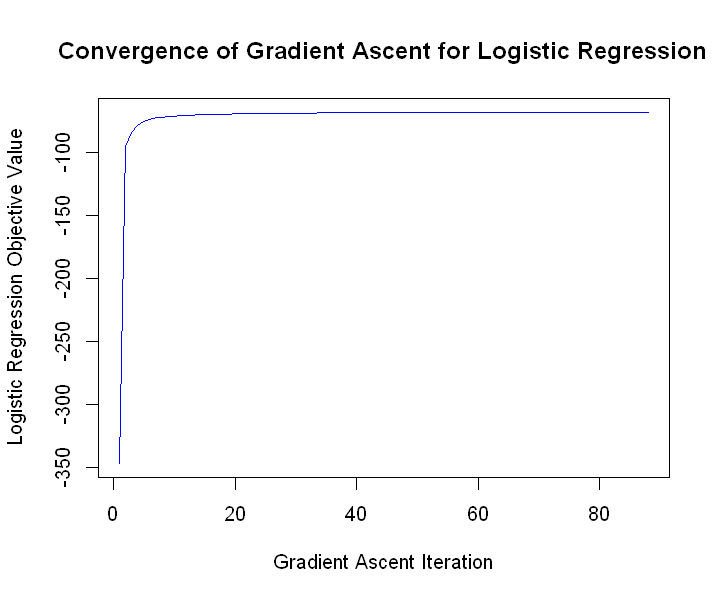

In [68]:
# Plot the objective value per iteration
options(repr.plot.width=6, repr.plot.height=5)
plot( 
    1:length(objVals),
    objVals,
    type="l",
    col="blue",
    main="Convergence of Gradient Ascent for Logistic Regression" ,
    xlab="Gradient Ascent Iteration" ,
    ylab="Logistic Regression Objective Value"
);

cat(sprintf("-->Gradient ascent coverges after %d iterations\n", length(objVals)-1))

\textbf{g)} We will evaluate now, how the training and test error change as the training set size increases.



In [73]:
# Evaluate the training and test erorr as a function of training set size
n<- dim(XTrain)[1];
kVals <- seq(10,n,by=10);
m<- dim(XTest)[1];
trainingError <- matrix(0,length(kVals),1);
testError <- matrix(0,length(kVals),1);

for (kInd in 1:length(kVals)){
    # Set k
    k <- kVals[kInd];
    
    # Generate training set
    subsetInds <- sample(n,k,replace = F);
    XTrainSubset <- XTrain[subsetInds,];
    yTrainSubset <- yTrain[subsetInds];
    
    # Train logistic regression
    out<- LR_GradientAscent(XTrainSubset,yTrainSubset);
    wHat<-out[[1]]
    
     # Test classifier on training set
    out<- LR_PredictLabels(XTrainSubset,yTrainSubset,wHat);
    yHatTrain<-out[[1]]
    numErrorsTrain<-out[[2]]
    trainingError[kInd] <- numErrorsTrain/k;
    
    # Test classifier on test set
    out<- LR_PredictLabels(XTest,yTest,wHat);
    yHatTest<-out[[1]]
    numErrorsTest<-out[[2]]
    testError[kInd] <- numErrorsTest/m;
}

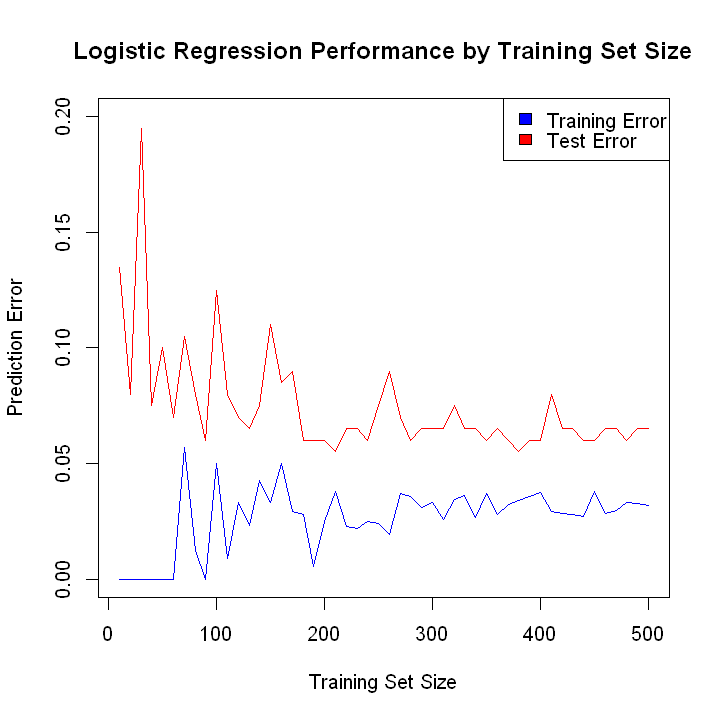

In [89]:
options(repr.plot.width=6, repr.plot.height=6)
plot( 
    kVals,
    trainingError,
    type="l",
    col="blue",
    main="Logistic Regression Performance by Training Set Size" ,
    xlab="Training Set Size" ,
    ylab="Prediction Error"  ,
    ylim= c(0,0.20) 
);
lines(kVals,testError, col="red")
legend("topright",c("Training Error ","Test Error"),fill=c("blue","red"))

When we increase the Training Set Size, our model can't remember all training data, but it will try to find some general setting that applies to the majority of training data for reducing loss during training. 

With small Training Sets we have overfiting and that is the reason we have high Test Error and zero Training Error with very small Training Set Size.

We see that the Test Error decreases as the Training Set Size grows. This happens because, the bigger the Training Set becomes, the better the predictions are of our model. It becomes more and more efficient.

But we observe that the opposite happens for our Training Error, that it is increasing as the Training Set Size grows.<br>
This happens because the 13 misclassified examples in the Test Set we saw earlier, have greater chance to be selected for training, as the Training Set Size grows. Those points cannot be classified correctly so they are the reason the Training Error increases.

\textbf{h)} To get the decision boundary we want:

$$
P(Y=C1|\mathbf{x^{(i)}}) = \sigma(w^T\mathbf{x^{(i)}}) = 0.5
$$
in other words:
$$
\sigma(w^T\mathbf{x^{(i)}}) =  \frac{1}{1 + e^{-(w_0 + w_1 x^{(i)}_1 + w_2 x^{(i)}_2 + ... + w_p x^{(i)}_p)}} =0.5
$$
This is possible if:
$$
e^{-(w_0 + w_1 x^{(i)}_1 + w_2 x^{(i)}_2 + ... + w_p x^{(i)}_p)} = e^0 = 1
$$
So we neet to have:
$$
w_0 + w_1 x^{(i)}_1 + w_2 x^{(i)}_2 + ... + w_p x^{(i)}_p =0
$$

which is a hyperplane in p dimensions, a plane in 3 dimensions and a line in 2 dimensions. <br>
To understand it in better let's use p=2:
$$
w_0 + w_1 x^{(i)}_1 + w_2 x^{(i)}_2 =0
$$
we can express it with respect to $x_2$ to take the line formila we all know:
$$
x^{(i)}_2 =  -\frac{w_0}{w_2} -\frac{w_1}{w_2} x^{(i)}_1
$$
this looks like $ y= b + ax$

\textbf{i)} To plot the decision boundary we use the formula from above.
I was implemented like this:

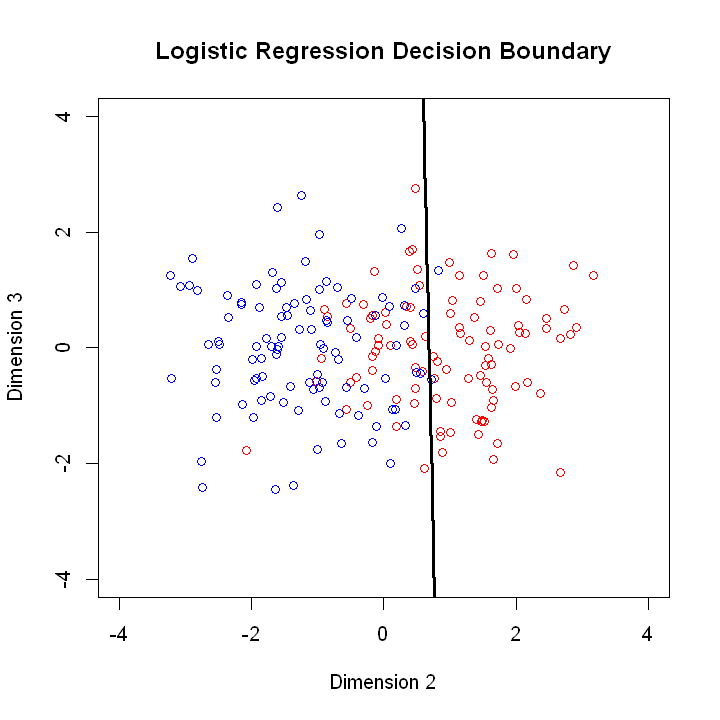

In [122]:
# Train logistic regression
out<-LR_GradientAscent(XTrain,yTrain);
wHat<-out[[1]]
objVals<-out[[2]]

# Plot data in 2d
j=2; k=3;
ind0 = yTest == 0;
ind1 = yTest == 1;

options(repr.plot.width=6, repr.plot.height=6)
plot( 
    XTest[ind0,j],
    XTest[ind0,k],
    col="red",
    main="Logistic Regression Decision Boundary" ,
    xlab=sprintf('Dimension %d',j) ,
    ylab=sprintf('Dimension %d',k) ,
    ylim= c(-4,4),
    xlim= c(-4,4)
);
lines(XTest[ind1,j],XTest[ind1,k], type="p" ,col="blue")

# Calculate decision boundary
dbDimJ = seq(min(XTest[,j]), max(XTest[,j]) ,by=0.01);
dbDimK = -( wHat[1] + wHat[j+1] * dbDimJ) / wHat[k+1];

lines(dbDimJ,dbDimK, type="l" ,col="black", lwd=3)